In [1]:
import pandas as pd



In [2]:
df_walk_1 = pd.read_json("gehen-2023-05-26_07-39-48.json")
df_Auto_1 = pd.read_json("autofahren-2023-05-26_07-48-45.json")
df_bus_1 = pd.read_json("Bus_24.05-1-2023-05-24_10-49-43.json")

In [21]:
df_walk_1.shape

(2532, 30)

In [23]:
df_Auto_1.shape

(432, 30)

In [24]:
df_bus_1.shape

(16935, 34)

In [3]:
df_walk_1.head()
df_walk_1.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'altitude',
       'speedAccuracy', 'bearingAccuracy', 'latitude',
       'altitudeAboveMeanSeaLevel', 'bearing', 'horizontalAccuracy',
       'verticalAccuracy', 'longitude', 'speed', 'version', 'device name',
       'recording time', 'platform', 'appVersion', 'device id', 'sensors',
       'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy', 'pitch'],
      dtype='object')

In [4]:
df_walk_1.head()

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685087e+18,1.036473,2.824855,-0.192988,-0.271774,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685087e+18,2.033060,-0.342538,0.365158,-1.282551,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685087e+18,3.029644,-4.201201,0.404010,-0.710063,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685087e+18,4.026231,1.199325,2.623168,3.359652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685087e+18,5.022817,-1.525441,-1.230406,2.665533,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_Auto_1.head()

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685087e+18,0.444758,0.034197,-0.074515,0.019053,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685087e+18,1.441366,1.852312,2.691182,1.966580,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685087e+18,2.437974,-5.768282,-3.087461,-1.986791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685087e+18,3.434586,-0.051814,0.050561,0.111605,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685087e+18,4.431198,-0.059723,0.010639,0.053371,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

df_types =pd.concat([df_walk_1.dtypes, df_Auto_1.dtypes, df_bus_1.dtypes], axis = 1)

df_types.columns = ['Walk', 'Bike', 'Bus']
df_types

,Walk,Bike,Bus
sensor,object,object,object
time,float64,float64,float64
seconds_elapsed,float64,float64,float64
z,float64,float64,float64
y,float64,float64,float64
x,float64,float64,float64
altitude,float64,float64,float64
speedAccuracy,float64,float64,float64
bearingAccuracy,float64,float64,float64
latitude,float64,float64,float64


In [8]:
# data preprocessing

# convert 'time' into date format
df_walk_1['time'] = pd.to_datetime(df_walk_1['time'])
df_Auto_1['time'] = pd.to_datetime(df_Auto_1['time'])
df_bus_1['time'] = pd.to_datetime(df_bus_1['time'])

display(df_walk_1.head(2), df_Auto_1.head(2))

df_walk_1 = df_walk_1.set_index('time')
df_Auto_1 = df_Auto_1.set_index('time')
df_bus_1 = df_bus_1.set_index('time')

display(df_walk_1.head(2), df_Auto_1.head(2))

,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-26 07:39:49.290472960,1.036473,2.824855,-0.192988,-0.271774,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-26 07:39:50.287059712,2.033060,-0.342538,0.365158,-1.282551,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,time,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-26 07:48:45.786757632,0.444758,0.034197,-0.074515,0.019053,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-26 07:48:46.783366144,1.441366,1.852312,2.691182,1.966580,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,,
2023-05-26 07:39:49.290472960,Accelerometer,1.036473,2.824855,-0.192988,-0.271774,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-26 07:39:50.287059712,Accelerometer,2.033060,-0.342538,0.365158,-1.282551,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,sensor,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,,
2023-05-26 07:48:45.786757632,Accelerometer,0.444758,0.034197,-0.074515,0.019053,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-26 07:48:46.783366144,Accelerometer,1.441366,1.852312,2.691182,1.966580,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#### Select and Plot the data

# show the available sensors

df_walk_1['sensor'].unique()
df_Auto_1['sensor'].unique()
df_bus_1['sensor'].unique()

array(['Accelerometer', 'Battery', 'Brightness', 'Gravity', 'Gyroscope',
       'Light', 'Location', 'Magnetometer', 'Metadata', 'Orientation'],
      dtype=object)

In [10]:
### select and plot accelerometer data from 

df_walk_1_acc = df_walk_1[df_walk_1['sensor'] == 'Accelerometer']
df_Auto_1_acc = df_Auto_1[df_Auto_1['sensor'] == 'Accelerometer']
df_bus_1_acc = df_bus_1[df_bus_1['sensor'] == 'Accelerometer']


# select only relevant columns

df_walk_1_acc = df_walk_1_acc[['y', 'x', 'z']]
df_Auto_1_acc = df_Auto_1_acc[['y', 'x', 'z']]
df_bus_1_acc = df_bus_1_acc[['y', 'x', 'z']]


<Axes: xlabel='time'>

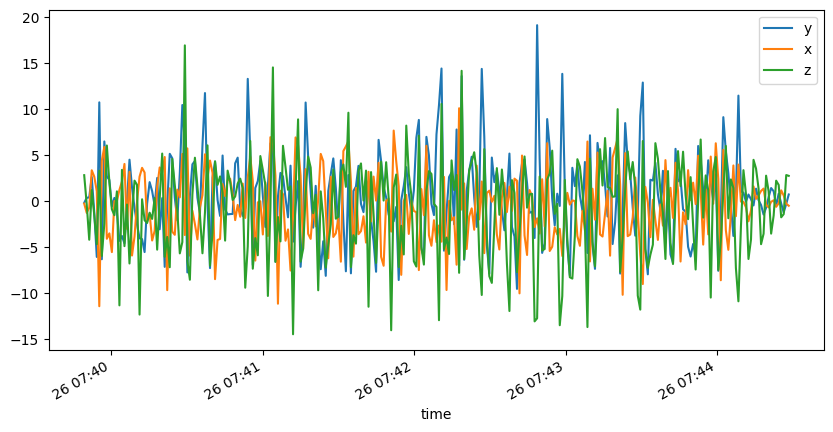

In [11]:
df_walk_1_acc.plot(figsize=(10,5))

<Axes: >

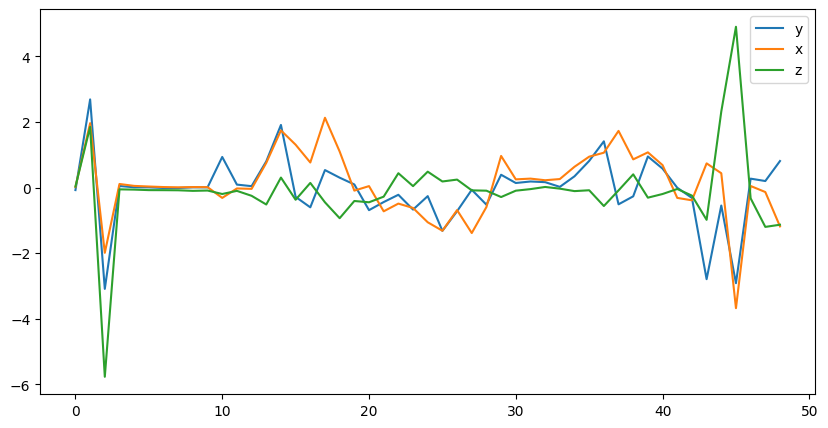

In [ ]:
df_Auto_1_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

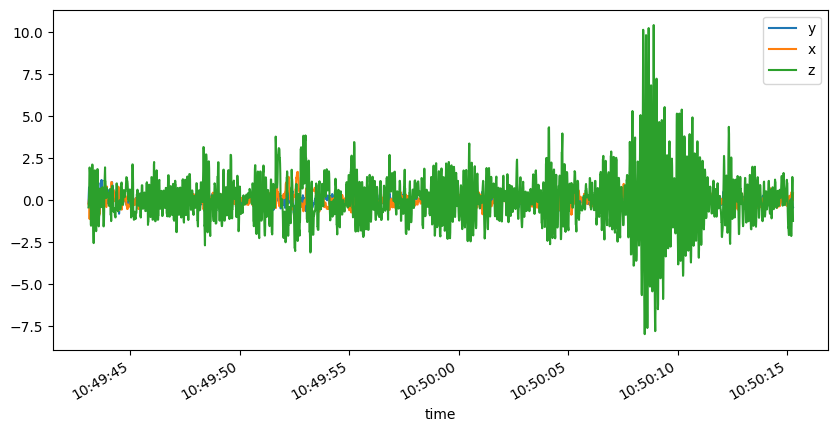

In [12]:
df_bus_1_acc.plot(figsize=(10,5))

In [13]:
df_walk_1.describe()

,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,bearing,...,longitude,speed,version,yaw,qx,qz,roll,qw,qy,pitch
count,2531.000000,1969.000000,1969.000000,1969.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,1.0,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,140.577464,-33.621570,2.736065,-0.624279,385.359848,1.326539,42.932932,49.014698,339.769848,286.821163,...,12.086222,1.370920,3.0,0.394776,0.235831,-0.495150,-1.243400,-0.367508,0.596859,-1.158314
std,81.028749,76.672081,18.646028,10.481864,2.073527,0.352040,15.618140,0.000280,2.073527,37.979186,...,0.001574,0.361160,NaN,1.131871,0.180801,0.260196,1.681559,0.242194,0.222710,0.493905
min,-12.802272,-250.465454,-77.495529,-37.864223,383.296201,-1.000000,-1.000000,49.013734,337.706201,-1.000000,...,12.083505,-1.000000,3.0,-3.036715,-0.271362,-0.710480,-3.122575,-0.991888,-0.096145,-1.537350
25%,70.771533,-8.472808,-1.891116,-1.559265,384.496684,1.233754,34.238600,49.014524,338.906684,279.886531,...,12.084840,1.280100,3.0,-0.399931,0.117833,-0.637082,-2.831825,-0.429379,0.513741,-1.403037
50%,140.557368,-0.402054,0.774872,-0.149531,384.752800,1.414411,40.645120,49.014712,339.162800,286.794039,...,12.086243,1.388887,3.0,-0.063550,0.271626,-0.577248,-1.449599,-0.356177,0.638230,-1.288306
75%,210.564964,0.536985,9.140524,1.125478,385.260567,1.520350,48.853464,49.014909,339.670567,297.122631,...,12.087644,1.520516,3.0,1.592737,0.335642,-0.531952,0.002419,-0.165266,0.785279,-1.219507
max,281.127327,16.953746,50.860428,56.977585,406.848267,1.970000,157.044901,49.015119,361.258266,349.101562,...,12.089041,2.477242,3.0,2.488650,0.750882,0.616124,3.139617,-0.015035,0.837315,0.547468


In [14]:
df_Auto_1.describe()

,seconds_elapsed,z,y,x,altitude,speedAccuracy,bearingAccuracy,latitude,altitudeAboveMeanSeaLevel,bearing,...,longitude,speed,version,yaw,qx,qz,roll,qw,qy,pitch
count,431.000000,345.000000,345.000000,345.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,1.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,24.332184,-26.452931,12.671458,19.079301,176.406176,0.729125,98.464024,49.015872,336.599960,243.076982,...,12.079633,2.181817,3.0,-1.887656,-0.043500,0.781906,-0.076222,-0.517780,0.047507,0.143221
std,14.403216,67.772714,36.984978,40.202778,193.980314,0.603257,74.165073,0.000306,1.865734,27.043377,...,0.000580,2.941654,NaN,0.777102,0.125265,0.265697,0.352764,0.160352,0.082482,0.217455
min,-0.341456,-227.839096,-87.915634,-91.486343,0.000000,0.200000,14.133391,49.015320,334.000000,198.734511,...,12.078541,0.000000,3.0,-2.465960,-0.583231,-0.174855,-2.447665,-0.973567,-0.025633,0.001799
25%,11.533095,-9.740137,-0.217496,-0.100983,0.000000,0.200000,15.000000,49.015694,335.300000,233.314392,...,12.079356,0.000000,3.0,-2.250600,-0.028005,0.851981,-0.082062,-0.513533,0.016422,0.049211
50%,24.363893,-0.447601,0.000542,0.019053,0.000000,0.200000,78.000000,49.015755,335.800000,239.700000,...,12.079439,0.000000,3.0,-2.101564,-0.012387,0.867290,-0.034412,-0.496993,0.038459,0.071794
75%,36.934813,0.008180,0.936248,1.731004,383.091863,1.344528,180.000000,49.016178,337.501863,280.553955,...,12.080175,4.424222,3.0,-2.062000,0.007430,0.900650,0.028348,-0.429500,0.052564,0.111241
max,49.179531,106.081894,116.634499,151.450623,385.439810,1.832062,180.000000,49.016182,339.849809,280.553979,...,12.080246,7.716667,3.0,1.142051,0.062564,0.942974,0.086994,-0.330585,0.592784,1.049104


In [25]:
df_bus_1.describe()

,seconds_elapsed,z,y,x,batteryLevel,brightness,lux,bearingAccuracy,speedAccuracy,verticalAccuracy,...,longitude,latitude,version,qz,qy,qx,qw,roll,pitch,yaw
count,16934.000000,12873.000000,12873.000000,12873.000000,33.00,33.000000,749.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,1.0,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,16.198770,3.949877,-0.515241,4.835422,0.57,0.513726,2345.555407,26.333333,0.316854,3.715325,...,11.020933,49.585178,3.0,-0.117265,-0.014370,0.048426,0.292595,0.041021,-0.304278,0.224382
std,9.288585,6.631708,4.450457,9.087154,0.00,0.000000,858.672395,52.159129,0.185487,1.076024,...,0.000105,0.000956,NaN,0.932740,0.141891,0.034329,0.083949,0.037235,0.025480,2.535286
min,-11.623000,-28.320000,-26.519999,-9.420000,0.57,0.513726,0.000000,0.000000,0.000000,1.000000,...,11.020734,49.583629,3.0,-0.990253,-0.189539,-0.039496,0.018277,-0.057802,-0.389174,-3.089410
25%,8.158143,-0.023769,-0.242499,-0.207912,0.57,0.513726,1928.000000,10.000000,0.222487,4.000382,...,11.020868,49.584417,3.0,-0.915780,-0.139610,0.015879,0.204928,0.017213,-0.321985,-2.718849
50%,16.190639,1.055212,0.018376,0.021962,0.57,0.513726,2410.000000,10.000000,0.312192,4.072770,...,11.020948,49.585184,3.0,-0.905710,-0.118754,0.058486,0.299577,0.034200,-0.303834,2.339304
75%,24.234639,9.326862,2.463419,0.986302,0.57,0.513726,2719.000000,10.000000,0.392709,4.145515,...,11.020965,49.585889,3.0,0.966987,0.147879,0.074871,0.374959,0.063893,-0.285378,2.375903
max,32.989000,31.139999,7.440000,33.000000,0.57,0.513726,13834.000000,180.000000,0.796764,4.396425,...,11.021144,49.587198,3.0,0.990288,0.173647,0.110796,0.427858,0.149893,-0.235109,3.116260
